# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:Muhamad Khadavi Febrian** [Input Nama]
- **Email:muhamadkhadavifebrian@gmail.com** [Input Email]
- **ID Dicoding:febrian_fbrn** [Input Username]

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata penyewaan sepeda berdasarkan jam?
- Berapa rata-rata penyewaan sepeda berdasarkan musim?
- Apakah kondisi cuaca mempengaruhi rata-rata penyewaan sepeda?
- Antara hari libur dan hari tidak libur, manakah yang rata-rata penyewaan sepedanya lebih tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
uploaded = files.upload()
hour_df = pd.read_csv('hour.csv')
hour_df.head()

Saving hour.csv to hour.csv


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
from google.colab import files
uploaded = files.upload()
day_df = pd.read_csv('day.csv')
day_df.head()

Saving day.csv to day.csv


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Upload hour_csv dan day_csv ke Google Collaboration

### Assessing Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- pada dataset hour_csv, terdapat kesalahan tipe data. Yaitu kolom dteday memimiliki tipe data object (string), Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime
- pada dataset day_csv, terdapat kesalahan tipe data. Yaitu kolom dteday memimiliki tipe data object (string), Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime

### Cleaning Data

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- mengganti tipe data pada kolom dteday menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
rentals_hour_avg = hour_df.groupby('hr')['cnt'].mean()
print("Rata-rata Jumlah Penyewaan Berdasarkan Jam:")
print(rentals_hour_avg)

Rata-rata Jumlah Penyewaan Berdasarkan Jam:
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


In [15]:
day_avg = day_df.groupby('season')['cnt'].mean()
print("Rata-rata Jumlah Sewa Sepeda /hari Berdasarkan Musim:")
print(day_avg)

Rata-rata Jumlah Sewa Sepeda /hari Berdasarkan Musim:
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


In [16]:
weathersit_avg = day_df.groupby('weathersit')['cnt'].mean()
print("Rata-rata Jumlah Penyewaan Berdasarkan Kondisi Cuaca:")
print(weathersit_avg)

Rata-rata Jumlah Penyewaan Berdasarkan Kondisi Cuaca:
weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


In [17]:
holiday_avg = day_df.groupby('holiday')['cnt'].mean()
print("Rata-rata Jumlah Penyewaan Berdasarkan Hari Libur:")
print(holiday_avg)

Rata-rata Jumlah Penyewaan Berdasarkan Hari Libur:
holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64


**Insight:**
- Berdasarkan rata-rata penyewaan sepeda per jam, waktu sibuk di pagi hari (7-9) dan sore hari(16-18) menunjukkan ratar-rata penyewaan tertinggi. Oleh karena itu, penting untuk menyiapkan dan mendistribusikan jumlah sepeda untuk disewa yang lebih banyak di jam sibuk.
- Berdasarkan rata-rata penyewaan sepeda per musim, musim gugur memiliki rata-rata penyewaan tertinggi sebesar 5644, yang diikuti oleh musim panas, musim dingin, dan musim semi. Penyewaan sepeda yang cenderung tinggi mungkin saja dipengaruhi oleh kondisi cuaca yang lebih mendukung.
- Kondisi cuaca mempengaruhi jumlah rata-rata penyewaan sepeda, sehingga cuaca yang baik harus mengoptimalkan layanan penyewaan sepeda karena permintaan sedang tinggi.
- Berdasarkan hari libur atau tidak libur, penyewaan sepeda lebih tinggi pada hari tidak libur (4527) dibandingkan hari libur (3735). Hal ini memungkinkan bahwa penyewaan sepeda dilakukan untuk keperluan perjalanan kerja atau sekolah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

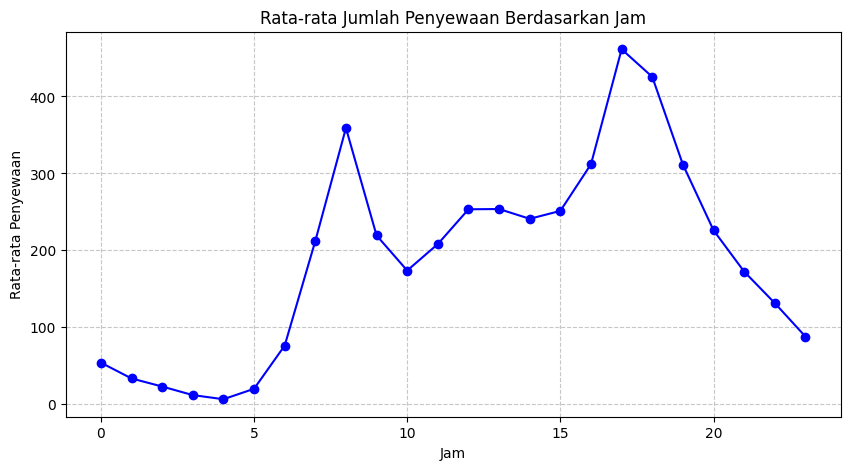

In [18]:
rentals_hour_avg = hour_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 5))
rentals_hour_avg.plot (kind= 'line', marker='o', linestyle='-', color='blue')
plt.title('Rata-rata Jumlah Penyewaan Berdasarkan Jam', fontsize=12)
plt.xlabel('Jam', fontsize=10)
plt.ylabel('Rata-rata Penyewaan', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2:

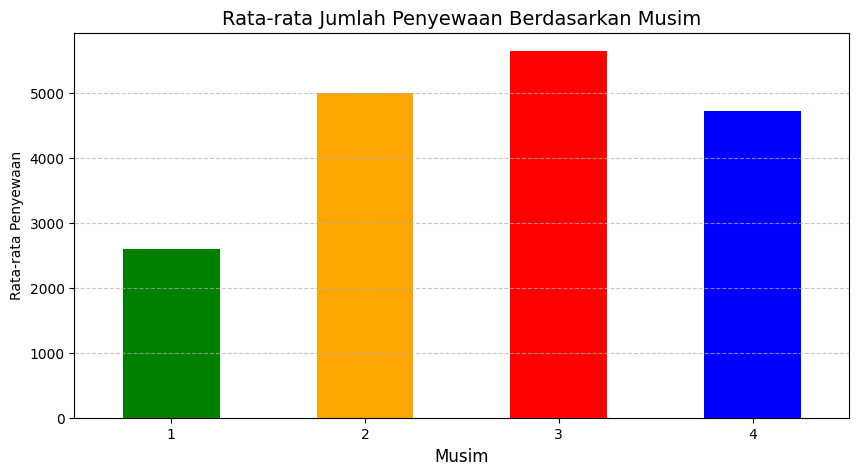

In [19]:
rentals_season_avg = day_df.groupby('season')['cnt'].mean()

plt.figure(figsize=(10, 5))
rentals_season_avg.plot (kind= 'bar', color= ['green', 'orange', 'red', 'blue'])
plt.title('Rata-rata Jumlah Penyewaan Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=10)
plt.xticks(rotation = 0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 3:

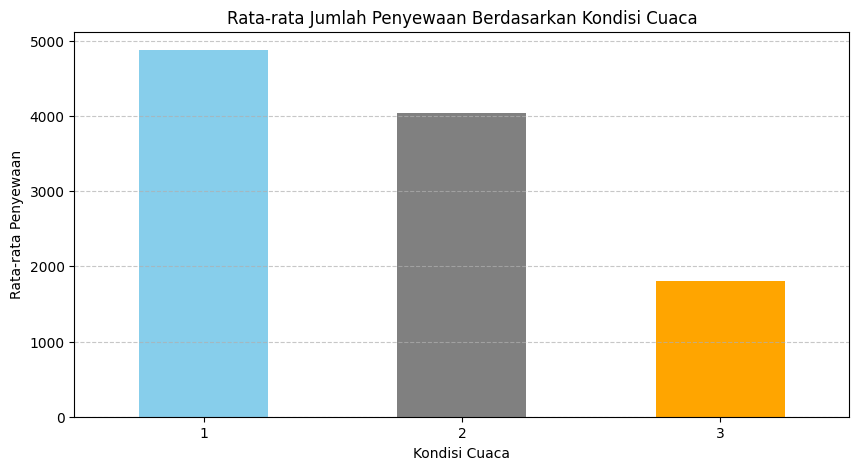

In [28]:
weather_conditions = day_df.groupby('weathersit')['cnt'].mean()

plt.figure(figsize=(10, 5))
weather_conditions.plot (kind= 'bar',
                         color= ['skyblue', 'gray', 'orange', 'darkblue'])
plt.title('Rata-rata Jumlah Penyewaan Berdasarkan Kondisi Cuaca', fontsize=12)
plt.xlabel('Kondisi Cuaca', fontsize=10)
plt.ylabel('Rata-rata Penyewaan', fontsize=10)
plt.xticks(ticks=range(len(weather_conditions.index)),
           labels=weather_conditions.index,
           rotation=0
           )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 4:

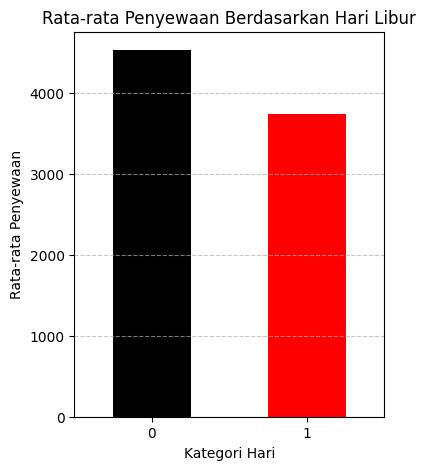

In [31]:
holiday_labels = day_df.groupby('holiday')['cnt'].mean()

plt.figure(figsize=(4, 5))
holiday_labels.plot (kind= 'bar', color=['black', 'red'])
plt.title('Rata-rata Penyewaan Berdasarkan Hari Libur', fontsize=12)
plt.xlabel('Kategori Hari', fontsize=10)
plt.ylabel('Rata-rata Penyewaan', fontsize=10)
plt.xticks (rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan jam sibuk pada pagi dan sore hari, operasional penyewaan sepeda harus dilakukan dengan optimal agar dapat memaksimalkan potensi penyewaan sepeda. Pada jam sibuk tersebut, dapat dikatakan bahwa masyarakat sedang berada dalam perjalanan; baik menuju kantor/sekolah dsb. Oleh karena itu, penyediaan dan distribusi penyewaan sepeda harus ditingkatkan agar dapat memaksimalkan potensi penyewaan sepeda.
- Selanjutnya, penyewaan sepeda tertinggi ada pada musim gugur. Mungkin saja cuaca memberikan pengaruh yang tinggi dalam penyewaan sepeda. Pada musim ini, pihak operasional penyewaan sepeda dapat menambahkan jumlah sepeda yang dapat di sewa oleh masyarakat.
- Pada analisis selanjutnya, ditemukan bahwa cuaca sangat mempengaruhi jumlah penyewaan sepeda. seperti pada cuaca yang cerah atau berawan, masyarakat dapat melakukan perjalanan dengan menyewa sepeda. Hal itu dapat menjadi pertimbangan pihak operasional bahwa cuaca yanh baik dapat meningkatkan jumlah penyewaan sepeda, dan sebaliknya cuaca yang buruk dapat menurunkan tingkat penyewaan sepeda.
- Kemudian, penyewaan sepeda di hari tidak libur menunjukkan nilai yangh lebih tinggi dibandingkan di hari libur. Berkaitan dengan kesimpulan satu, bisa saja masyarakat menyewa sepeda untuk berangkat kerja/sekolah ataupun keperluan lainnya. Untuk dapat meningkatkan jumlah sewa sepeda dihari libur, pihak manajemen dapat memberikan promosi atau mengiklan bahwa bersepeda di hari libur dapat dilakukan dengan santai bersama keluarga.